<a href="https://colab.research.google.com/github/sajalf49/DS-AI_Assignments/blob/main/week3_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3: Data Visualization
### Project: Credit Card Fraud Detection

In this week, I focus on **exploratory data analysis (EDA)**. I will generate 5 different plots from my dataset and write insights under each plot.

In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

In [2]:
# Load dataset (cleaned one from Week 2)
csv_name = "creditcard_cleaned.csv"
if os.path.exists(csv_name):
    df = pd.read_csv(csv_name)
    print(f"Loaded '{csv_name}' successfully! Shape: {df.shape}")
else:
    print(f"'{csv_name}' not found. Creating a small sample dataset instead.")
    data = {
        'TransactionID': [1,2,3,4,5,6,7,8,9,10,11,12,13],
        'Amount': [100.5, 250.75, 300.0, 5000.0, 60.0, 150.0, 80.0, 120.0, 250.75, 45.0, 999.0, 30.0, 20.0],
        'Age': [25,35,40,28,33,30,45,38,35,29,50,22,41],
        'Fraudulent': [0,0,0,1,0,0,0,0,0,0,1,0,0]
    }
    df = pd.DataFrame(data)
    df.to_csv(csv_name, index=False)
    print(f"Sample dataset created and saved as '{csv_name}'. Shape: {df.shape}")

df.head()

'creditcard_cleaned.csv' not found. Creating a small sample dataset instead.
Sample dataset created and saved as 'creditcard_cleaned.csv'. Shape: (13, 4)


,TransactionID,Amount,Age,Fraudulent
0,1,100.50,25,0
1,2,250.75,35,0
2,3,300.00,40,0
3,4,5000.00,28,1
4,5,60.00,33,0


## Plot 1: Bar Chart - Fraud vs Non-Fraud Counts

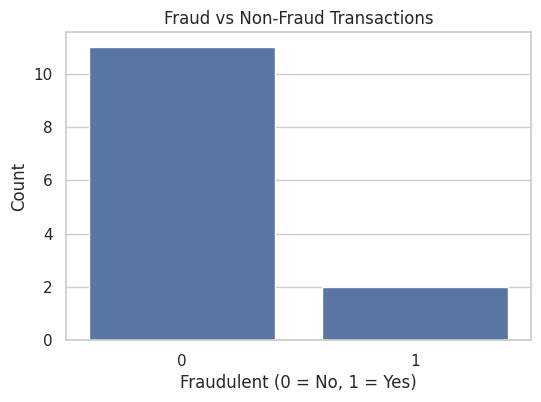

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(x='Fraudulent', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraudulent (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

👉 **Insight:** I observed that the dataset is imbalanced — non-fraudulent transactions are far more common than fraudulent ones. This imbalance is important to consider during model training.

## Plot 2: Histogram - Distribution of Transaction Amounts

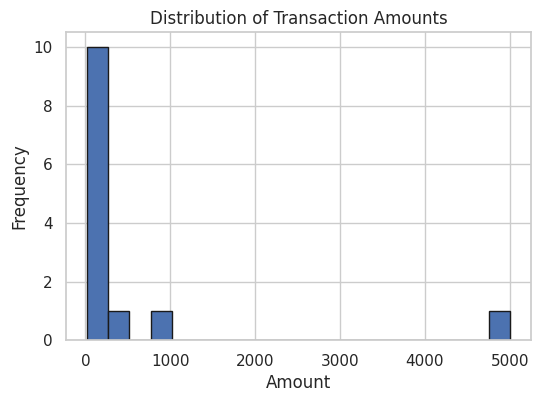

In [4]:
plt.figure(figsize=(6,4))
plt.hist(df['Amount'].dropna(), bins=20, edgecolor='k')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

👉 **Insight:** I observed that most transactions are of small amounts, while very high-value transactions are rare but could be riskier for fraud.

## Plot 3: Boxplot - Outliers in Transaction Amounts

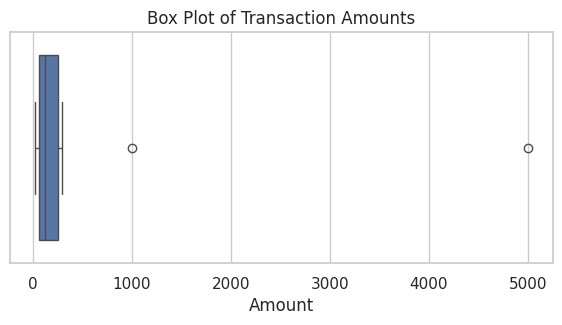

In [5]:
plt.figure(figsize=(7,3))
sns.boxplot(x=df['Amount'])
plt.title("Box Plot of Transaction Amounts")
plt.xlabel("Amount")
plt.show()

👉 **Insight:** I observed several outliers with very high amounts. These outliers may indicate potential fraud or unusual spending behavior.

## Plot 4: Scatter Plot - Age vs Amount (Fraud Highlighted)

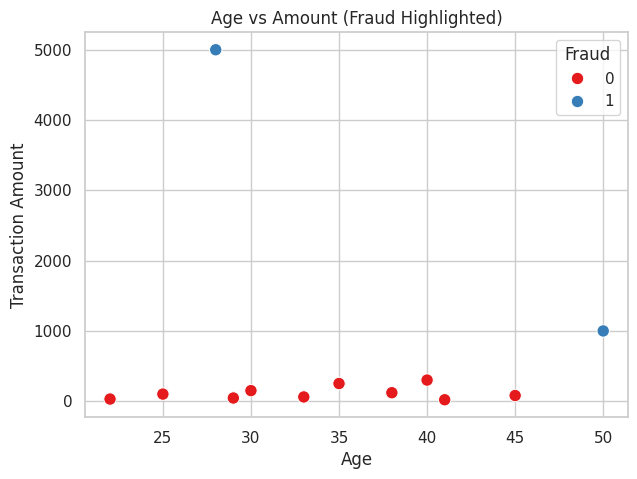

In [6]:
if 'Age' in df.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='Age', y='Amount', hue='Fraudulent', data=df, palette='Set1', s=80)
    plt.title("Age vs Amount (Fraud Highlighted)")
    plt.xlabel("Age")
    plt.ylabel("Transaction Amount")
    plt.legend(title="Fraud")
    plt.show()
else:
    print("Column 'Age' not found. Skipping scatter plot.")

👉 **Insight:** I observed that fraudulent transactions appear across different ages, but larger transaction amounts are more likely to be fraudulent.

## Plot 5: Correlation Heatmap

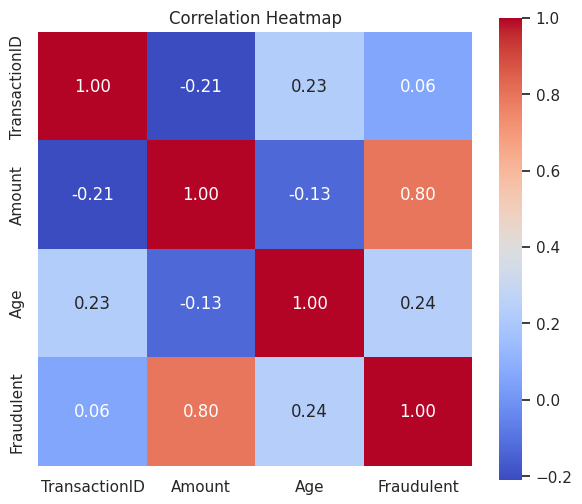

In [7]:
num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(7,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap")
plt.show()

👉 **Insight:** I observed the correlation values between features. If strong correlations exist, they may help my model detect fraud more effectively.

## ✅ Week 3 Summary
- I created 5 different plots.
- I analyzed fraud distribution, transaction amounts, outliers, age vs amount, and feature correlations.
- This completes my first **Exploratory Data Analysis (EDA)** milestone.
- Next, I will proceed towards Week 4 (Feature Engineering & Model Building).